## CLASSIFICATION MODEL DETECTING SPAM COMMENTS ON YOUTUBE.

## Data Understanding.

In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Get the file name
file_name = list(uploaded.keys())[0]



Saving Youtube-Spam-Dataset.csv to Youtube-Spam-Dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

## EXPLANATORY DATA ANALYSIS

In [ ]:

# Loading the dataset

df = pd.read_csv('Youtube-Spam-Dataset.csv')
df.head()


,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   VIDEO_NAME  1956 non-null   object
 5   CLASS       1956 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 91.8+ KB


**Missing values**

In [ ]:
df.isnull().sum()

,0
COMMENT_ID,0
AUTHOR,0
DATE,245
CONTENT,0
VIDEO_NAME,0
CLASS,0


**Handling duplicates**

In [ ]:
##Looking for duplicates
df.duplicated().sum()

3

In [ ]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#Counting for the Class column.
df['CLASS'].value_counts()

,count
CLASS,
1,1003
0,950


**Replacing the missing dates in the Date column

In [ ]:
# Converting DATE column to datetime type and replacing missing values with the median date
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Calculating the median date
median_date = df['DATE'].median()

# Replacing missing dates with the median date
df['DATE'].fillna(median_date, inplace=True)

# Verifying the changes
df['DATE'].isnull().sum(), df['DATE'].head()


(0,
 0   2013-11-07 06:20:48
 1   2013-11-07 12:37:15
 2   2013-11-08 17:34:21
 3   2013-11-09 08:28:43
 4   2013-11-10 16:05:38
 Name: DATE, dtype: datetime64[ns])

In [ ]:
##Recalling the dataset with the replaced date on the colUMns with missing DATE
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07 06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07 12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08 17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09 08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10 16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


In [ ]:
df.isnull().sum()

,0
COMMENT_ID,0
AUTHOR,0
DATE,0
CONTENT,0
VIDEO_NAME,0
CLASS,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1953 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   COMMENT_ID  1953 non-null   object        
 1   AUTHOR      1953 non-null   object        
 2   DATE        1953 non-null   datetime64[ns]
 3   CONTENT     1953 non-null   object        
 4   VIDEO_NAME  1953 non-null   object        
 5   CLASS       1953 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 106.8+ KB


**Feature Distribution**

CLASS
1    1003
0     950
Name: count, dtype: int64


<ipython-input-19-4c0c6c9c8158>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CLASS', palette='viridis')


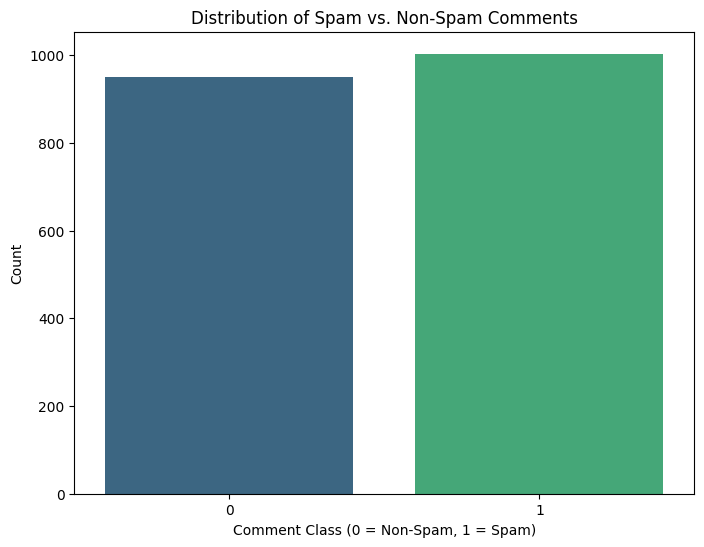

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
# df = pd.read_csv('your_dataset.csv')

# Check for the unique values in the 'CLASS' column
print(df['CLASS'].value_counts())

# Plot the distribution of spam vs. non-spam comments
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='CLASS', palette='viridis')
plt.title('Distribution of Spam vs. Non-Spam Comments')
plt.xlabel('Comment Class (0 = Non-Spam, 1 = Spam)')
plt.ylabel('Count')
plt.show()


# Next Steps to be followed.

**1. Feature Engineering**

**Convert categorical features:** Convert categorical features like AUTHOR, VIDEO_NAME, and possibly CONTENT into numerical format for the model.

**Text preprocessing:** Since the primary feature for spam detection is likely the CONTENT of the comments, you can perform the following:

Remove punctuation, URLs, and special characters from the CONTENT.

Lowercase the text.

Tokenize the text (convert it into words).

Remove stop words (common words like "the", "is", etc.).

Vectorize the text using techniques like TF-IDF (Term Frequency-Inverse

Document Frequency) or Bag of Words.


**2. Train-Test Split**

Split your data into training and test sets, typically with an 80:20 or 70:30 ratio.

**3. Model Selection**

Start with classification models like Logistic Regression, Naive Bayes,

Decision Trees, or more complex ones like Random Forest or XGBoost.

Since this is a binary classification problem (CLASS is either 1 for spam or 0 for non-spam), your target variable is already set.

**4. Evaluation Metrics**

Use appropriate metrics for evaluating classification models:

Accuracy

Precision

Recall

F1-Score

ROC-AUC curve

## 1. Feature Engineering

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Download stopwords if you haven't already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Text Preprocessing function
def preprocess_text(text):
    # 1. Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # 2. Convert to lowercase
    text = text.lower()

    # 3. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 4. Tokenize the text
    tokens = text.split()

    # 5. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Join the tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing to the CONTENT column
df['CLEANED_CONTENT'] = df['CONTENT'].apply(preprocess_text)

# Display the first few rows to verify the cleaning process
df[['CONTENT', 'CLEANED_CONTENT']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,CONTENT,CLEANED_CONTENT
0,"Huh, anyway check out this you[tube] channel: ...",huh anyway check youtube channel kobyoshi02
1,Hey guys check out my new channel and our firs...,hey guys check new channel first vid us monkey...
2,just for test I have to say murdev.com,test say murdevcom
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,shaking sexy ass channel enjoy ﻿
4,watch?v=vtaRGgvGtWQ Check this out .﻿,watchvvtarggvgtwq check ﻿


In [ ]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to 1000 features to avoid too much dimensionality

# Fit and transform the CLEANED_CONTENT column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['CLEANED_CONTENT'])

# Convert the matrix to a DataFrame for easier integration into the dataset
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the original DataFrame with the TF-IDF DataFrame
df_tfidf = pd.concat([df.reset_index(drop=True), tfidf_df], axis=1)

# Display the dataset with the new TF-IDF features
df_tfidf.head()


,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS,CLEANED_CONTENT,10,100,1000000,...,you39re,youll,young,youre,youtube,youtubebr,youtuber,youtubers,zonepacom,강남스타일
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07 06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1,huh anyway check youtube channel kobyoshi02,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.364429,0.0,0.0,0.0,0.0,0.0
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07 12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1,hey guys check new channel first vid us monkey...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08 17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1,test say murdevcom,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09 08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1,shaking sexy ass channel enjoy ﻿,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10 16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1,watchvvtarggvgtwq check ﻿,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


##2.0 SPLITTING THE DATASET

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = df_tfidf.drop(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'VIDEO_NAME', 'CLASS', 'CLEANED_CONTENT'], axis=1)
y = df_tfidf['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Building the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

#3. Evaluating the Model

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       190
           1       0.94      0.84      0.89       201

    accuracy                           0.89       391
   macro avg       0.89      0.89      0.89       391
weighted avg       0.89      0.89      0.89       391

Accuracy: 0.8900255754475703
ROC-AUC: 0.9516234616391727


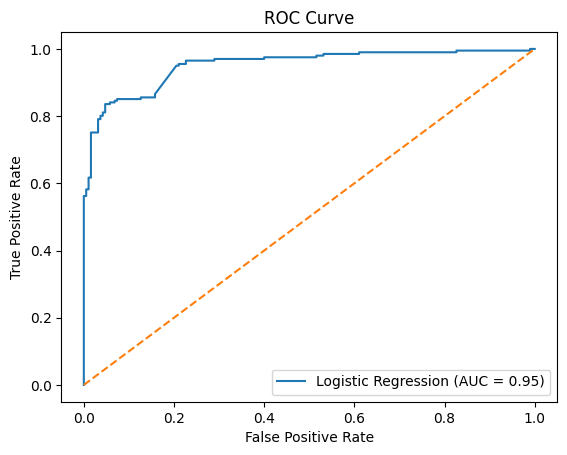

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = logreg.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print(f'ROC-AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**The results of your logistic regression model look very promising! Here's a quick summary of the key metrics:**

**Accuracy:** The model achieved an accuracy of 89%, meaning that 89% of the time, the model correctly classifies spam vs. non-spam comments.

**Precision for Class 0 (Non-Spam):** 85% — out of all comments predicted as non-spam, 85% were actually non-spam.

**Precision for Class 1 (Spam):** 94% — out of all comments predicted as spam, 94% were actually spam.

**Recall for Class 0:** 94% — the model correctly identified 94% of the actual non-spam comments.

**Recall for Class 1:** 84% — the model correctly identified 84% of the actual spam comments.

**F1-Score:** Both classes have an F1-Score of 0.89, showing a balanced trade-off between precision and recall.

**ROC-AUC:** The ROC-AUC score of 0.95 indicates excellent performance in distinguishing between the spam and non-spam comments.

## NEXT STEPS

**Model Tuning:** You can experiment with tuning the hyperparameters (like regularization) of the logistic regression model or try other models (e.g., Decision Trees, Random Forests, or SVM).

**Confusion Matrix:** To better understand where the model is making errors, you can plot the confusion matrix.

**Cross-Validation:** Implement k-fold cross-validation to get a more robust evaluation of model performance.

# Confusion Matrix

In [ ]:
#plot a confusion matrix
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns
cm(y_test,y_pred)


array([[179,  11],
       [ 32, 169]])

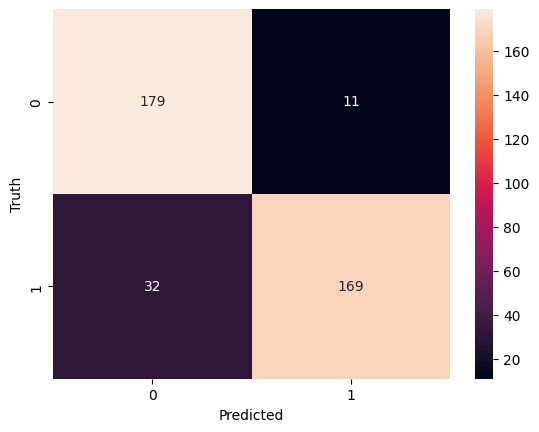

In [ ]:
#Plot the confusion matrix
sns.heatmap(cm(y_test,y_pred),annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Model 2

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print("Classification Report:")
print(classification_report_rf)



Accuracy: 0.907928388746803
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       190
           1       0.89      0.94      0.91       201

    accuracy                           0.91       391
   macro avg       0.91      0.91      0.91       391
weighted avg       0.91      0.91      0.91       391



Overall, the model has a good balance of precision and recall, and the F1-scores are quite close for both classes.

If you want to improve further, you might consider hyperparameter tuning or feature engineering to see if you can enhance the model's performance even more.

In [ ]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10,20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)
print("Best Index:", grid_search.best_index_)

# Use the best model for predictions
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
classification_report_best_rf = classification_report(y_test, y_pred_best_rf)

print(f"Best Model Accuracy: {accuracy_best_rf}")
print("Best Model Classification Report:")
print(classification_report_best_rf)




Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9046059637912673
Best Estimator: RandomForestClassifier(n_estimators=300)
Best Index: 2
Best Model Accuracy: 0.9130434782608695
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       190
           1       0.89      0.95      0.92       201

    accuracy                           0.91       391
   macro avg       0.92      0.91      0.91       391
weighted avg       0.91      0.91      0.91       391



The F1-scores have improved for both classes, and the recall for class 1 is now higher. This indicates that your tuned model is better at identifying positive cases (class 1) while maintaining good precision and recall for class 0.


Solid improvements with hyperparameter tuning.

It looks like a strong performance!